In [1]:
import re
import unicodedata
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# ÿ™ÿ≠ŸÖŸäŸÑ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™

In [2]:

data_df = pd.read_csv("dataset.csv", delimiter=',')
data_df.rename(columns={"target": "correct", "input": "error"}, inplace=True)


In [3]:
pd.options.display.max_colwidth = 600
data_df[:5]

correct  \
0                                                                               Good luck on your new start !   
1                                                             My teacher is going to move to change his job .   
2  He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .   
3                                                           And he took in my favorite subjects like soccer .   
4                                                Actually , he was the one who let me know about Lang - 8 . .   

                                                                                                        error  
0                                                                               Good luck on your new start !  
1                                                             My teacher is going to move to change his job .  
2  He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .  
3                                                            And he took in my favorite subject like soccer .  
4                                                         Actually , who let me know about Lang - 8 was him .

### ÿ≠ÿ∞ŸÅ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖŸÉÿ±ÿ±ÿ© ŸàÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØÿ© Ÿàÿπÿ±ÿ∂ ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ 

In [4]:
data_df = data_df.drop_duplicates()
data_df = data_df.dropna()
data_df.describe()

correct               error
count                    950746              950746
unique                   937961              943959
top     Thank you for reading .  Nice to meet you .
freq                         31                  11

### ÿπÿ±ÿ∂ ÿßŸÑ wordcloud ŸÑŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑÿ™Ÿä ÿ™ÿ≠ÿ™ŸàŸä ÿ£ÿÆÿ∑ÿßÿ° Ÿà ÿßŸÑÿµÿ≠Ÿäÿ≠ÿ© 


In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(words):


    stopwords = set(STOPWORDS)

    filtered_text = ' '.join([word for word in words.split() if word.lower() not in stopwords])

    wordcloud_no_stopwords = WordCloud(
        width=800,
        height=800,
        background_color='white',
        min_font_size=10
    ).generate(filtered_text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud_no_stopwords)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


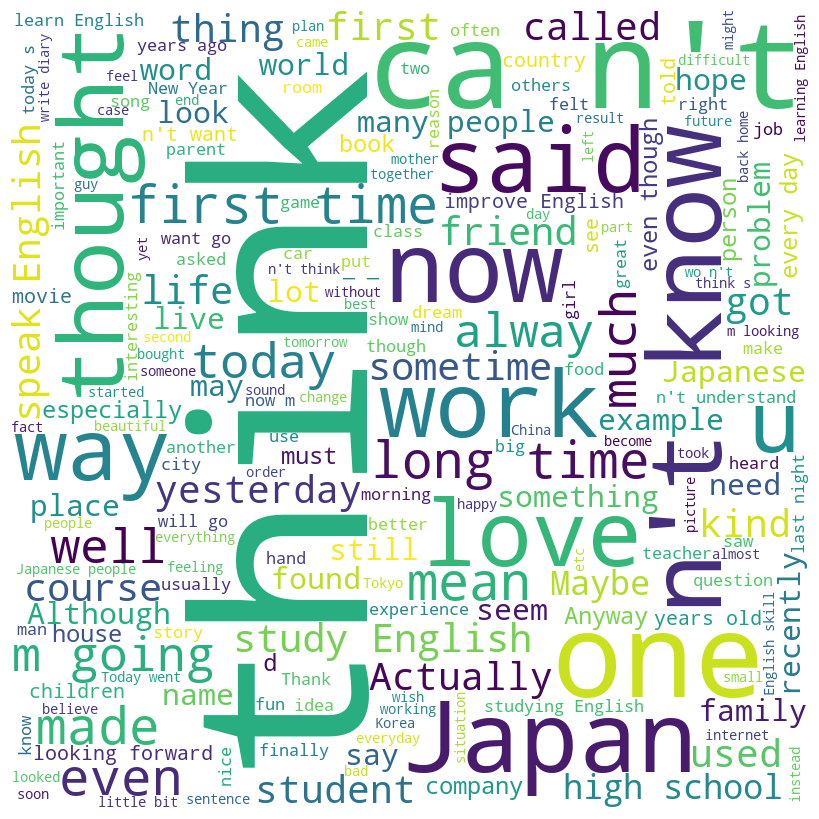

In [7]:
words = " ".join(data_df['correct'])
generate_wordcloud(words)

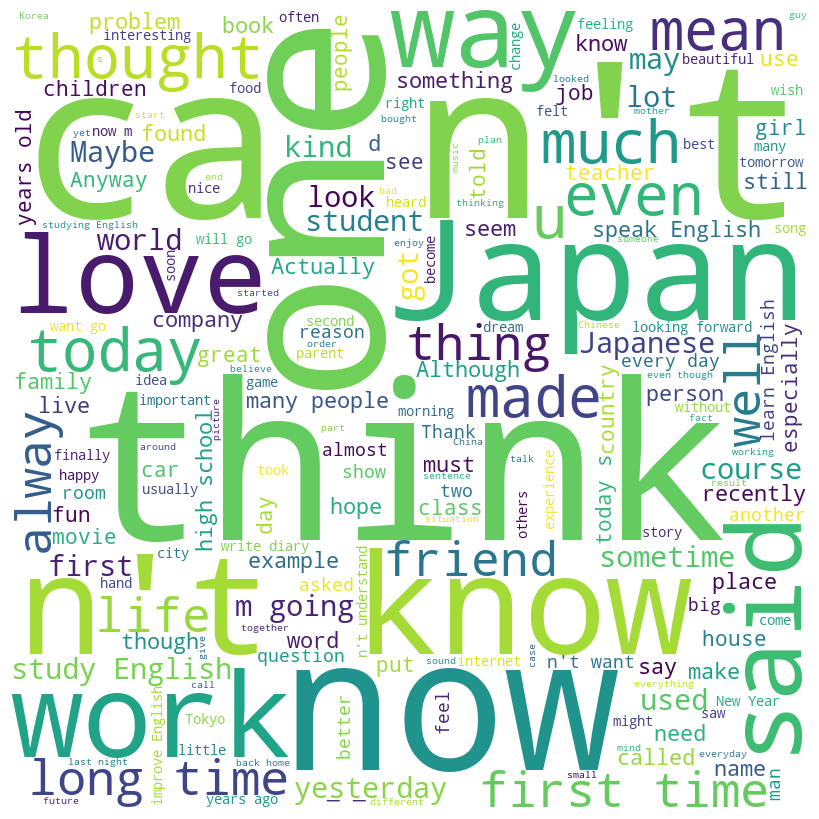

In [8]:
words = " ".join(data_df['error'])
generate_wordcloud(words)

##### ŸÑÿßÿ≠ÿ∏ŸÜÿß ŸÖŸÜŸáÿß ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖÿ™ÿ¥ÿßÿ®Ÿáÿ© ŸàŸàÿ¨ŸàÿØ ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖÿÆÿ™ÿµÿ±ÿ© ŸàÿßŸÑÿßÿÆÿ™ÿµÿßÿ±ÿßÿ™

### ŸáŸÜÿß ŸÜŸÇŸàŸÖ ÿ®ÿ±ÿ≥ŸÖ ŸÖÿÆÿ∑ÿ∑ÿßÿ™ ÿ™Ÿàÿ∂ÿ≠ ÿ£ÿ∑ŸàÿßŸÑ ÿßŸÑÿ¨ŸÖŸÑ ÿßŸÑÿµÿ≠Ÿäÿ≠ÿ© ŸàÿßŸÑÿÆÿßÿ∑ÿ¶ÿ© 

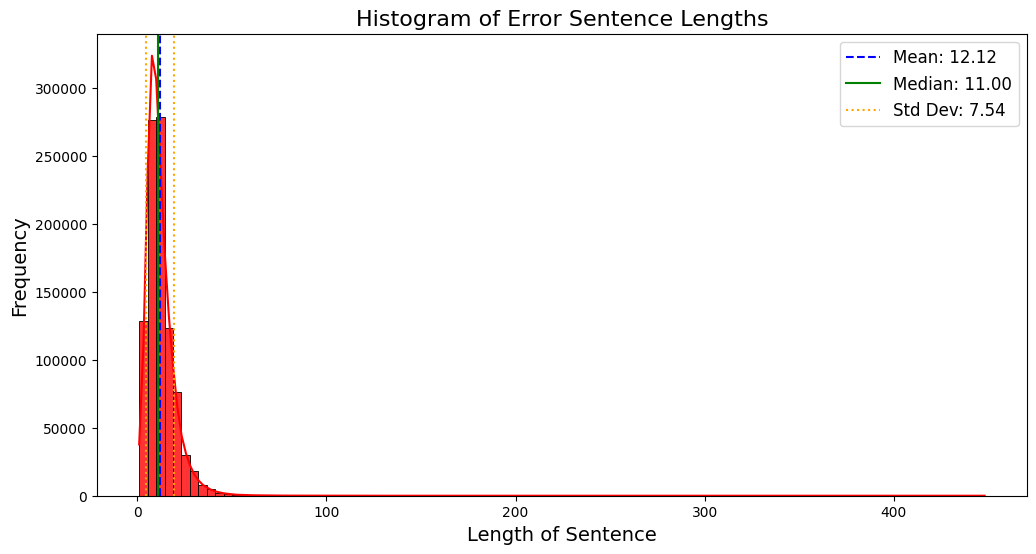

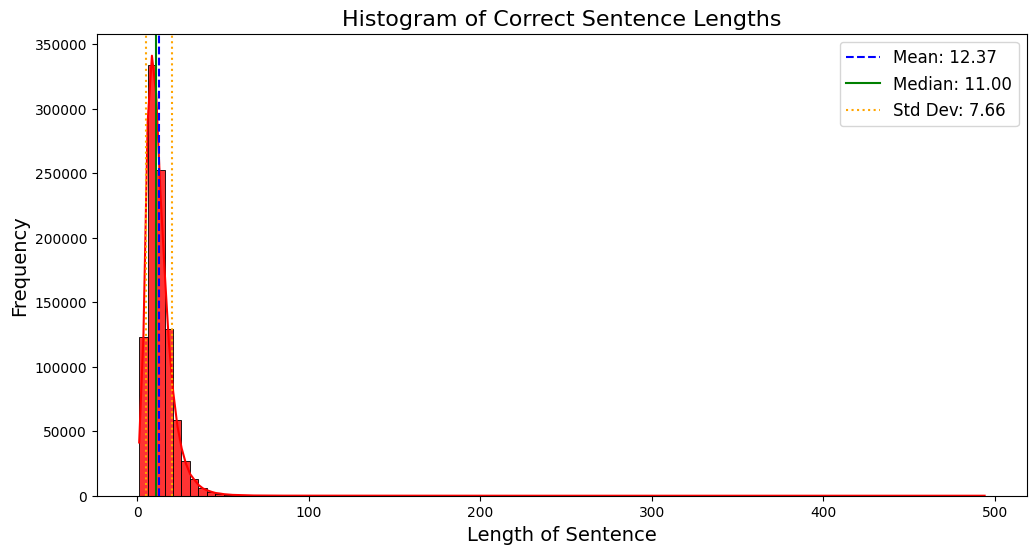

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_sentence_length_histogram(data, column, title):

    sentence_lengths = data[column].str.split().str.len()

    # ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿ•ÿ≠ÿµÿßÿ¶Ÿäÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
    mean_length = np.mean(sentence_lengths)
    median_length = np.median(sentence_lengths)
    std_length = np.std(sentence_lengths)

    plt.style.use("default")

    plt.figure(figsize=(12, 6))
    sns.histplot(sentence_lengths, bins=100, color="red", kde=True, alpha=0.8)

    # ÿ•ÿ∂ÿßŸÅÿ© ÿÆÿ∑Ÿàÿ∑ ŸÑŸÑÿ•ÿ≠ÿµÿßÿ¶Ÿäÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
    plt.axvline(
        mean_length, color="blue", linestyle="--", label=f"Mean: {mean_length:.2f}"
    )
    plt.axvline(
        median_length,
        color="green",
        linestyle="-",
        label=f"Median: {median_length:.2f}",
    )
    plt.axvline(
        mean_length + std_length,
        color="orange",
        linestyle=":",
        label=f"Std Dev: {std_length:.2f}",
    )
    plt.axvline(mean_length - std_length, color="orange", linestyle=":")

    plt.title(f"Histogram of {title} Sentence Lengths", fontsize=16)
    plt.xlabel("Length of Sentence", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.tick_params(colors="black")
    plt.legend(fontsize=12)

    plt.show()


plot_sentence_length_histogram(data_df, "error", "Error")
plot_sentence_length_histogram(data_df, "correct", "Correct")

##### ŸÑÿßÿ≠ÿ∏ŸÜÿß ŸÖŸÜŸáÿß ÿßŸÜ ŸÖÿπÿ∏ŸÖ ÿßŸÑÿ¨ŸÖŸÑ ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ÿπÿØÿØ ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑŸÉŸÑŸÖÿßÿ™ (10-15 ŸÉŸÑŸÖÿ©) ŸàÿßŸÑÿ£ÿ∑ŸàÿßŸÑ ÿßŸÑÿ™Ÿä ÿ™ÿ™ÿ¨ÿßŸàÿ≤ 50 ŸÉŸÑŸÖÿ© ŸÜÿßÿØÿ±ÿ© ÿ¨ÿØŸãÿß Ÿáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ ÿ∫Ÿäÿ± ŸÖÿ™ŸÖÿßÿ´ŸÑ ŸàŸäŸÖŸäŸÑ ŸÜÿ≠Ÿà ÿßŸÑÿ¨ŸÖŸÑ ÿßŸÑŸÇÿµŸäÿ±ÿ©

### Ÿáÿ∞ÿß ÿßŸÑÿ™ÿßÿ®ÿπ ŸäŸÇŸàŸÖ ÿ®ÿπÿ±ÿ∂ ÿ£ŸÉÿ´ÿ± n ŸÉŸÑŸÖÿ© ÿ™ŸÉÿ±ÿßÿ±ÿß ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÑÿØŸäŸÜÿß

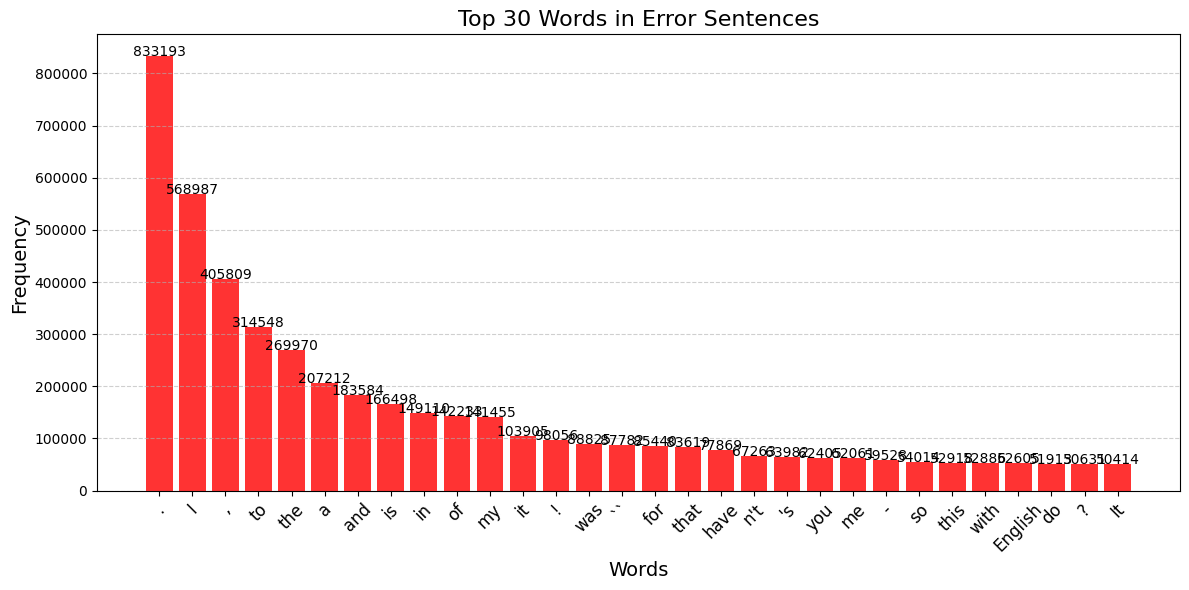

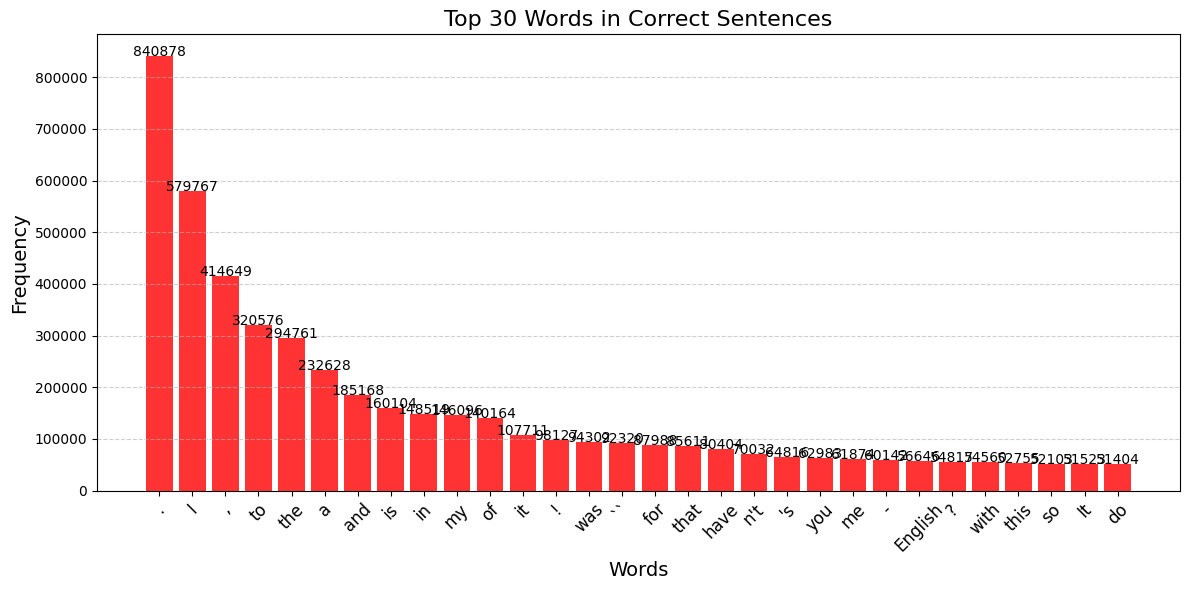

In [22]:
from collections import Counter
import matplotlib.pyplot as plt


def plot_top_n_words(text, title, n=30):

    words = text.split()
    counter = Counter(words)
    most_common = counter.most_common(n)
    words, counts = zip(*most_common)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(words, counts, color="red", alpha=0.8)
    plt.title(f"Top {n} Words in {title}", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.ylabel("Frequency", fontsize=14)
    plt.xlabel("Words", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.6)  # ÿÆÿ∑Ÿàÿ∑ ÿ¥ÿ®ŸÉŸäÿ© ŸÑŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿπŸÖŸàÿØŸä

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 5,
            f"{int(height)}",
            ha="center",
            fontsize=10,
        )

    plt.tight_layout()
    plt.show()


error_text = " ".join(data_df["error"])
correct_text = " ".join(data_df["correct"])


plot_top_n_words(error_text, "Error Sentences")
plot_top_n_words(correct_text, "Correct Sentences")

#### ŸÅŸàÿ¨ÿØÿß ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ™ÿ±ŸÇŸäŸÖ ŸàÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖÿÆÿ™ÿµÿ±ÿ©

### Ÿáÿ∞ÿß ÿßŸÑÿ™ÿßÿ®ÿπ ÿßÿ≥ÿ™ÿπŸÖŸÑŸÜÿßŸá ŸÑÿ±ÿ≥ŸÖ ŸÖÿÆÿ∑ÿ∑ ŸäŸàÿ∂ÿ≠ ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÅÿ±ŸäÿØÿ© ŸÅŸä ÿßŸÑÿ¨ŸÖŸÑ ÿßŸÑŸÖÿµÿ≠ÿ≠ÿ© ŸàÿßŸÑÿÆÿßÿ∑ÿ¶ÿ©

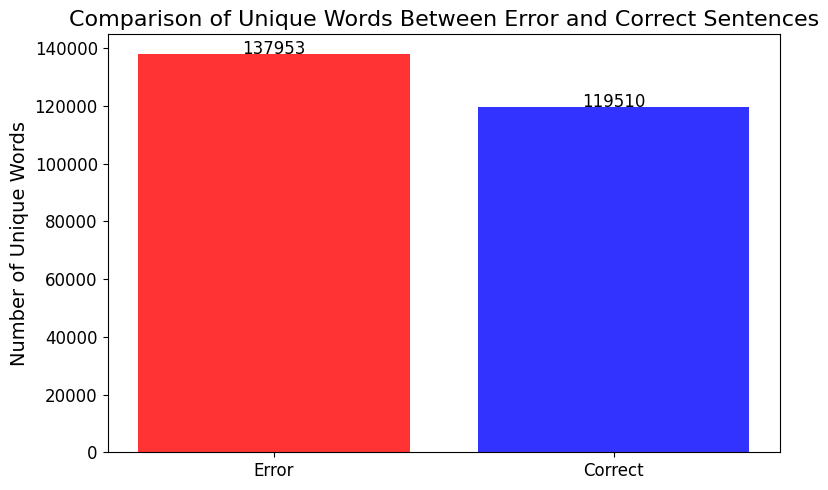

In [23]:
unique_words_error = len(set(error_text.split()))
unique_words_correct = len(set(correct_text.split()))


plt.figure(figsize=(8, 5))
bars = plt.bar(
    ["Error", "Correct"],
    [unique_words_error, unique_words_correct],
    color=["red", "blue"],
    alpha=0.8,
)


plt.title("Comparison of Unique Words Between Error and Correct Sentences", fontsize=16)
plt.ylabel("Number of Unique Words", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 200,
        f"{int(height)}",
        ha="center",
        fontsize=12,
    )


plt.tight_layout()
plt.show()

#### ŸÉŸÖÿß ŸÜŸÑÿßÿ≠ÿ∏ ŸáŸÜÿß Ÿàÿ¨ŸàÿØ ŸÉŸÑŸÖÿßÿ™ ŸÖŸÖŸäÿ≤ÿ© ÿ£ŸÉÿ´ÿ± ŸÅŸä ÿßŸÑÿ¨ŸÖŸÑ ÿßŸÑÿÆÿßÿ∑ÿ¶ÿ© ŸàŸáÿ∞ÿß ŸÖŸÜÿ∑ŸÇŸä ÿ™ÿ®ÿπÿßŸã ŸÑŸàÿ¨ŸàÿØ ÿßŸÑÿ£ÿÆÿ∑ÿßÿ°

### ŸÜŸÇŸàŸÖ ÿ®Ÿáÿ∞ÿß ÿßŸÑÿ™ÿßÿ®ÿπ ÿ®Ÿàÿ∂ÿπ ŸÇŸäŸÖÿ© nan  ŸÅŸä ÿßŸÑÿ≠ŸÇŸàŸÑ ÿßŸÑÿ™Ÿä ÿ∑ŸàŸÑŸáÿß ÿ£ŸÇŸÑ ŸÖŸÜ 5 Ÿàÿ£ŸÉÿ´ÿ± ŸÖŸÜ 15  ŸÑÿ≠ÿµÿ± ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿπŸÑŸâ ÿ∑ŸàŸÑ ÿ®ŸäÿßŸÜÿßÿ™ ÿ´ÿßÿ®ÿ™

In [144]:
import numpy as np

for i, row in enumerate(data_df["error"]):
    if (
       len(row.split(" ")) >= 15
        or len(row.split(" ")) <= 5
    ):
        data_df.iloc[i] = np.nan

In [145]:
data_df = data_df.dropna()
data_df.isna().any()
data_df.describe()

correct                       error
count                           290261                      290261
unique                          288198                      289553
top     This is my first diary entry .  This is my first writing .
freq                                20                           5

### ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ™Ÿàÿßÿ®ÿπ ŸÖÿÆÿ™ŸÑŸÅÿ© ŸÑÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑŸÜÿµ

In [146]:
import unicodedata
import re

# ŸÜŸÇŸàŸÖ ÿ®ÿßÿ≥ÿ™ÿ®ÿØÿßŸÑ ÿßŸÑÿ•ÿÆÿ™ÿµÿßÿ±ÿßÿ™ ÿßŸÑŸâ ÿ¥ŸÉŸÑŸáÿß ÿßŸÑÿ£ÿµŸÑŸä
def decontracted(phrase):
    contractions = {
        r"won't": "will not",
        r"can't": "can not",
        r"n't": " not",
        r"gon na": " going to",
        r"wan na": " want to",
        r"gonna": " going to",
        r"wanna": " want to",
        r"'re": " are",
        r"'s": " is",
        r"'d": " would",
        r"'ll": " will",
        r"'t": " not",
        r"'ve": " have",
        r"'m": " am",
    }
    for pattern, replacement in contractions.items():
        phrase = re.sub(pattern, replacement, phrase)
    return phrase

# ŸáŸàŸÜ ŸÜŸÇŸàŸÖ ÿ®ÿ≠ÿ∞ÿ∞ŸÅ ÿßŸÑÿ±ŸÖŸàÿ≤ ÿßŸÑÿ™ÿπÿ®Ÿäÿ±Ÿäÿ©
def remove_emoticons(text):

    emoticons = [r"xD", r":D", r":P", r"x D", r": D", r": P"]
    for emoticon in emoticons:
        text = re.sub(emoticon, "", text)
    return text


def clean_text(text):
    # ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ£ÿ≠ÿ±ŸÅ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© Ÿàÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÜÿµ ÿ•ŸÑŸâ ascii
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("ascii")

    text = decontracted(text)

    text = remove_emoticons(text) 
    # ŸáŸàŸÜ ÿπŸÖ ŸÜÿ≠ÿ∞ŸÅ ÿßŸÑŸÉŸÑÿßŸÖ ÿßŸÑŸÖŸàÿ¨ŸàÿØ ÿ∂ŸÖŸÜ ÿßŸÑÿ£ŸÇŸàÿßÿ≥ ŸÖÿπ ÿßŸÑÿ£ŸÇŸàÿßÿ≥ ŸÜŸÅÿ≥Ÿáÿß
    if "(" in text and ")" in text:
        try:
            text = re.sub(r"\([^)]*\)", "", text)
        except Exception:
            pass
    # ŸáŸàŸÜ ÿπŸÖ ŸÜÿπŸÖŸÑ ÿ™ŸÜÿ∏ŸäŸÅ ŸÑŸÑŸÜÿµŸàÿµ ŸÖŸÜ ÿÆŸÑÿßŸÑ ÿ≥ŸÑÿ≥ŸÑÿ© ŸÖŸÜ ÿßŸÑÿ™ÿπÿ®Ÿäÿ±ÿßÿ™ ŸÑÿ∂ŸÖÿßŸÜ ÿ™ŸÜÿ≥ŸäŸÇ ŸÖÿ™ŸÜÿßÿ≥ŸÇ
    text = re.sub(r"[^A-Za-z;!?.,\'\-\s]+", " ", text)
    text = re.sub(r"\.+", r" .", text)
    text = re.sub(r"\;+", r" , ", text)
    text = re.sub(r"!+", r" !", text)
    text = re.sub(r"\?+", r" ?", text)
    text = re.sub(r"\-+", r" - ", text)
    text = re.sub(r"\,+", r" , ", text)
    text = re.sub(r"\'+", r" ' ", text)
    text = re.sub(" +", " ", text)

    return text.strip()

In [147]:
data_df['correct'] = data_df['correct'].apply(clean_text)
data_df['error'] = data_df['error'].apply(clean_text)

In [148]:
data_df[:5]

correct  \
3            And he took in my favorite subjects like soccer .   
4   Actually , he was the one who let me know about Lang - . .   
6                 His Kanji ability is much better than mine .   
11      I heard a sentence last night when I was watching TV .   
15           When you go uphill , you have to bend your back .   

                                                error  
3    And he took in my favorite subject like soccer .  
4   Actually , who let me know about Lang - was him .  
6       His Kanji is ability is much better than me .  
11  I heard a sentence last night when I watched TV .  
15  When you go uphill , you hvae to bend your back .

In [149]:
data_df = data_df.drop_duplicates()
data_df = data_df.dropna()
data_df.describe()

correct   error
count   289554  289554
unique  286866  288705
top                   
freq        81      32

In [150]:
data_df.to_csv('cleaned.csv', index = False)

In [151]:
data_df = pd.read_csv('cleaned.csv')

### ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿÆÿßÿ∑ÿ¶ÿ© ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ÿπŸÖŸàÿØ ÿßŸÑÿ£ÿÆÿ∑ÿßÿßÿ° ÿßŸÑÿ™Ÿä ŸÑÿß ÿ™Ÿàÿ¨ÿØ ŸÅŸä ÿπŸÖŸàÿØ ÿßŸÑÿ™ÿµÿ≠Ÿäÿ≠ ŸÑŸÉŸÑ ÿµŸÅ

In [154]:
import pandas as pd
import nltk
nltk.download('punkt')

def get_errors(row):
    error_tokens = nltk.word_tokenize(row['error'])
    correct_tokens = nltk.word_tokenize(row['correct'])
    return [word for word in error_tokens if word not in correct_tokens]

data_df['identified_errors'] = data_df.apply(get_errors, axis=1)

error_frequency = data_df['identified_errors'].explode().value_counts()

print(error_frequency.head(10))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


identified_errors
the    13223
is     12359
a      11652
to     11077
in      8751
,       8724
of      8121
.       7023
it      5633
for     5471
Name: count, dtype: int64


In [155]:
data_df.head(2)

correct  \
0           And he took in my favorite subjects like soccer .   
1  Actually , he was the one who let me know about Lang - . .   

                                               error identified_errors  
0   And he took in my favorite subject like soccer .         [subject]  
1  Actually , who let me know about Lang - was him .             [him]

In [156]:
data_df.to_csv('cleaned2.csv', index = False)

# Encoder-Decoder using LSTM with Attention

In [160]:
import re
import datetime
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import keras
import tensorflow as tf
from sklearn.metrics import fbeta_score
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard
from keras.layers import Embedding,LSTM, TimeDistributed, Dense, Bidirectional
from keras.initializers import HeNormal, GlorotNormal, GlorotUniform
from nltk.translate.bleu_score import sentence_bleu
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
data = pd.read_csv('cleaned2.csv')

In [162]:
data.head(2)

correct  \
0           And he took in my favorite subjects like soccer .   
1  Actually , he was the one who let me know about Lang - . .   

                                               error identified_errors  
0   And he took in my favorite subject like soccer .       ['subject']  
1  Actually , who let me know about Lang - was him .           ['him']

### ÿØÿßŸÑÿ© ÿ™ŸÇŸàŸÖ ÿ®ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÜÿµŸàÿµ ŸÑÿ•ÿ∂ÿßŸÅÿ© ÿ±ŸÖŸàÿ≤ ÿ®ÿØÿßŸäÿ© (`<start>`) ŸàŸÜŸáÿßŸäÿ© (`<end>`) ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ÿßŸÑÿÆŸäÿßÿ±ÿßÿ™ ÿßŸÑŸÖÿ≠ÿØÿØÿ©
##### ÿ∑ÿ®ÿπÿßŸã ÿ±ŸÖÿ≤ ÿßŸÑÿ®ÿØÿßŸäÿ© `<start>` Ÿäÿ≥ÿßÿπÿØ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÅŸä ÿßŸÑÿ™ÿπÿ±ŸÅ ÿπŸÑŸâ ÿ®ÿØÿßŸäÿ© ÿßŸÑŸÜÿµ
##### Ÿà ÿ±ŸÖÿ≤ ÿßŸÑŸÜŸáÿßŸäÿ© `<end>` Ÿäÿ≠ÿØÿØ ŸÜŸáÿßŸäÿ© ÿßŸÑŸÜÿµÿå ŸÑÿ≠ÿ™Ÿâ Ÿäÿ≥ÿßÿπÿØ ŸÅŸä ŸÖŸáÿßŸÖ ŸÖÿ´ŸÑ ÿßŸÑÿ™ÿµÿ≠Ÿäÿ≠ÿå ÿßŸÑÿ™ÿ±ÿ¨ŸÖÿ©ÿå ÿ™ŸÑÿÆŸäÿµ ÿßŸÑŸÜÿµŸàÿµÿå ÿ£Ÿà ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßŸÑÿ¨ŸÖŸÑ

In [163]:
def preprocess(t, add_start_token, add_end_token):

  if add_start_token == True and add_end_token == False:
    t = '<start>'+' '+t
  if add_start_token == False and add_end_token == True:
    t = t+' '+'<end>'
  if add_start_token == True and add_end_token == True:
    t = '<start>'+' '+t+' '+'<end>'

  t = re.sub(' +', ' ', t)
  return t

In [164]:
encoder_input = [
    preprocess(line, add_start_token=True, add_end_token=True) for line in data["error"]
]
decoder_input = [
    preprocess(line, add_start_token=True, add_end_token=False)
    for line in data["correct"]
]
decoder_output = [
    preprocess(line, add_start_token=False, add_end_token=True)
    for line in data["correct"]
]

In [165]:
encoder_input[:2]

['<start> And he took in my favorite subject like soccer . <end>',
 '<start> Actually , who let me know about Lang - was him . <end>']

In [166]:
decoder_input[:2]

['<start> And he took in my favorite subjects like soccer .',
 '<start> Actually , he was the one who let me know about Lang - . .']

In [167]:
decoder_output[:2]

['And he took in my favorite subjects like soccer . <end>',
 'Actually , he was the one who let me know about Lang - . . <end>']

### ÿ™ÿ¨ŸáŸäÿ≤ ÿßŸÑŸÖÿØÿÆŸÑÿßÿ™ ŸÑŸÑŸÜŸÖŸàÿ∞ÿ¨

In [168]:
tokenizer = Tokenizer(filters="", split=" ")
# ŸÜŸÇŸàŸÖ ÿ®ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑ tokenizer ÿπŸÑŸâ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÑÿØŸäŸÜÿß
tokenizer.fit_on_texts(encoder_input)
# ŸÜŸÇŸàŸÖ ÿ®ÿßŸÑÿ≠ÿµŸàŸÑ ÿπŸÑŸâ ŸÇÿßŸÖŸàÿ≥ ÿßŸÑŸÉŸÑŸÖÿßÿ™ 
word_index = tokenizer.word_index

# ŸÜŸÇŸàŸÖ ÿ®ÿßŸÑÿ≠ÿµŸàŸÑ ÿπŸÑŸâ ÿßŸÉÿ®ÿ± ŸÇŸäŸÖÿ© ŸÑÿ∑ŸàŸÑ ÿßŸÑÿ≥ÿ∑ÿ± ŸÖŸÜ ÿ®ŸäŸÜ ÿßŸÑÿ≥ÿ∑Ÿàÿ± 
max_length = max([len(row.split(" ")) for row in encoder_input])
INPUT_ENCODER_LENGTH = max_length

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ŸÑÿ™ÿ≥ŸÑÿ≥ŸÑÿßÿ™ ÿ±ŸÇŸÖŸäÿ©
enc_input_encoded = tokenizer.texts_to_sequences(encoder_input)

# ŸÜŸÇŸàŸÖ ÿ®ÿßÿ∂ÿßŸÅÿ© padding ÿ£ÿµŸÅÿßÿ± ÿßŸÑŸâ ŸÜŸáÿßŸäÿ© ÿßŸÑÿ¨ŸÖŸÑ ÿßŸÑÿ™Ÿä ŸäŸÇŸÑ ÿ∑ŸàŸÑŸáÿß ÿπŸÜ ÿßŸÑÿ∑ŸàŸÑ ÿßŸÑŸÖÿ≠ÿØÿØ
enc_input_padded = pad_sequences(
    enc_input_encoded, maxlen=INPUT_ENCODER_LENGTH, padding="post"
)

print(enc_input_padded.shape)

(287054, 17)


In [169]:
decoder_data = decoder_input.copy()
decoder_data.extend(decoder_output)

out_tokenizer = Tokenizer(filters='', split=" ")
out_tokenizer.fit_on_texts(decoder_data)
word_index = out_tokenizer.word_index

max_length = max([ len(row.split(" ")) for row in decoder_input ])
INPUT_DECODER_LENGTH = max_length

In [170]:
dec_input_encoded = out_tokenizer.texts_to_sequences(decoder_input)
dec_input_padded = pad_sequences(
    dec_input_encoded, maxlen=INPUT_DECODER_LENGTH, padding="post", truncating="post"
)

print(dec_input_padded.shape)

(287054, 29)


In [171]:
print(decoder_input[0])
print(dec_input_padded[0])

<start> And he took in my favorite subjects like soccer .
[   3   12   46  178   13   10  266 1478   41  612    1    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [172]:
dec_output_encoded = out_tokenizer.texts_to_sequences(decoder_output)
dec_output_padded = pad_sequences(
    dec_output_encoded, maxlen=INPUT_DECODER_LENGTH, padding="post", truncating="post"
)

print(dec_output_padded.shape)

(287054, 29)


In [173]:
from nltk.tokenize import WhitespaceTokenizer
import numpy as np
import io


tokenizer = WhitespaceTokenizer()


def load_vectors(fname):
    fin = io.open(fname, "r", encoding="utf-8", newline="\n", errors="ignore")
    n, d = map(int, fin.readline().split())  # ŸÇÿ±ÿßÿ°ÿ© ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ Ÿàÿ£ÿ®ÿπÿßÿØ ÿßŸÑŸÖÿ™ÿ¨Ÿáÿßÿ™
    data = {}
    for line in fin:
        tokens = tokenizer.tokenize(
            line.rstrip()
        )  # ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑŸÜÿµ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ WhitespaceTokenizer
        word = tokens[0]  # ÿßŸÑŸÉŸÑŸÖÿ©
        vector = np.asarray(tokens[1:], dtype=float)  # ÿßŸÑŸÖÿ™ÿ¨Ÿá ÿßŸÑÿÆÿßÿµ ÿ®ÿßŸÑŸÉŸÑŸÖÿ©
        data[word] = vector
    return data

In [174]:
embedding_index = load_vectors('wiki-news-300d-1M.vec')

### ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑ embedding_matrix

In [233]:
word_index = tokenizer.word_index
num_tokens = len(word_index) + 2
embedding_dim = 300
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)

    if type(embedding_vector) == np.ndarray and embedding_vector.shape[0] == 300:
        embedding_matrix[i] = embedding_vector
        hits += 1

    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
np.save("input_embedding.npy", embedding_matrix)

Converted 31870 words (20333 misses)


In [234]:
word_index = out_tokenizer.word_index
num_tokens = len(word_index) + 2
embedding_dim = 300
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)

    if type(embedding_vector) == np.ndarray and embedding_vector.shape[0] == 300:
        embedding_matrix[i] = embedding_vector
        hits += 1

    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
np.save("output_embedding.npy", embedding_matrix)

Converted 28632 words (11263 misses)


In [236]:
in_embedding_matrix = np.load("input_embedding.npy")
out_embedding_matrix = np.load("output_embedding.npy")
print(in_embedding_matrix.shape, out_embedding_matrix.shape)

(52205, 300) (39897, 300)


### ÿßŸÑŸÉŸàÿØ ŸÑÿßŸäÿπŸàÿØ ŸÑŸÜÿß :)  ŸÑŸÇÿØ ÿ®ÿ≠ÿ´ŸÜÿß ÿπŸÜ ÿ™ŸÜŸÅŸäÿ∞ ŸÑŸÑŸàÿ±ŸÇÿ© ÿßŸÑÿ®ÿ≠ÿ´Ÿäÿ© ÿßŸÑÿ∞ŸÉŸàÿ±ÿ© ÿ®ÿßŸÑÿ™ŸÇÿ±Ÿäÿ± , ŸÜÿ™ŸÖŸÜŸâ ÿßŸÜ ŸäŸÜÿßŸÑ ÿßŸÑÿ™ŸÜŸÅŸäÿ∞ ŸàÿßŸÑŸÜÿ™Ÿäÿ≠ÿ© ÿßÿπÿ¨ÿßÿ®ŸÉŸÖ ŸÖÿπ ŸÉÿßŸÖŸÑ ÿßŸÑÿ¥ŸÉÿ± , ÿßŸÑÿ∑ŸÑÿßÿ®


#### ŸÜÿ¥ŸÉÿ± ŸàŸÇÿ™ŸÉŸÖ ŸàŸÉŸÑ ŸÖÿß ŸÇÿØŸÖÿ™ŸàŸá

### ÿßŸÑ Encoder

In [237]:
class Encoder(tf.keras.Model):

    def __init__(self, inp_vocab_size, embedding_size, lstm_size, input_length):

        super().__init__()
        
        self.vocab_size = inp_vocab_size

        self.embedding_size = embedding_size
        # ÿ™ÿ≠ÿØŸäÿØ ÿπÿØÿØ ÿßŸÑŸàÿ≠ÿØÿßÿ™ ÿßŸÑŸÖÿÆŸÅŸäÿ© ŸÅŸä ÿ∑ÿ®ŸÇÿ© LSTM
        self.lstm_units = lstm_size
        # ÿ∑ŸàŸÑ ÿ™ÿ≥ŸÑÿ≥ŸÑ ÿßŸÑŸÜÿµŸàÿµ ÿßŸÑŸÖÿØÿÆŸÑÿ©
        self.input_length = input_length


    def build(self, input_sequence):
        #  ÿ™ÿ£ÿÆÿ∞ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ™Ÿä ÿßŸÑŸÖŸÖÿ´ŸÑÿ© ÿ®ÿßÿ±ŸÇÿßŸÖ Ÿàÿ™ÿ≠ŸàŸëŸÑŸáÿß ÿ•ŸÑŸâ ŸÖÿ™ÿ¨Ÿáÿßÿ™ ÿπÿØÿØŸäÿ© ÿ∞ÿßÿ™ 300 ÿ®ÿπÿØ 
        self.embedding = Embedding(

            input_dim=self.vocab_size,

            output_dim=self.embedding_size,

            input_length=self.input_length,
            # Ÿäÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑ ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿ™ÿ∂ŸÖŸäŸÜ ÿßŸÑÿ™Ÿä ÿßÿπÿØŸäŸÜÿßŸáÿß ÿ≥ÿßÿ®ŸÇÿßŸã
            weights=[in_embedding_matrix],
            # ŸÜŸÇŸàŸÖ ÿ®ÿ™ÿ¨ÿßŸáŸÑ ŸÑŸÉŸÑ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿµŸÅÿ±Ÿäÿ© ŸàŸÇÿ™ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©
            mask_zero=True,
            # ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑŸÇŸäŸÖ ŸÅŸä ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿ™ÿ∂ŸÖŸäŸÜ ŸÑŸÜ ÿ™ÿ™ÿ∫Ÿäÿ± ÿ£ÿ´ŸÜÿßÿ° ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
            trainable=False,

            name="embedding_layer_encoder",

        )
        # Long Short Term Memory ŸÜŸàÿπ ŸÖŸÜ ÿßŸÑ RNN
        self.lstm = LSTM(
            # ÿπÿØÿØ ÿßŸÑŸàÿ≠ÿØÿßÿ™ ÿßŸÑŸÖÿÆŸÅŸäÿ© ÿ∑ÿ®ÿπÿßŸã ŸÉŸÑ ŸÖÿß ÿ≤ŸàÿØŸÜÿß ÿßŸÑÿπÿØÿØ ŸÉŸÑ ŸÖÿß ÿ≤ÿßÿØÿ™ ŸÇÿØÿ±ÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿπŸÑŸâ ÿ™ÿπŸÑŸÖ ÿßŸÑÿ£ŸÜŸÖÿßÿ∑ ÿßŸÑŸÖÿπŸÇÿØÿ©
            self.lstm_units,
            # Ÿäÿ™ŸÖ ÿ•ÿ±ÿ¨ÿßÿπ ÿßŸÑÿ≠ÿßŸÑÿ™ŸäŸÜ hidden state Ÿà cell state ÿπŸÜÿØ ŸÜŸáÿßŸäÿ© ÿßŸÑÿ™ÿ≥ŸÑÿ≥ŸÑ
            return_state=True,
            # ŸÑÿ™ÿ±ÿ¨ÿπ ŸÖÿÆÿ±ÿ¨ÿßÿ™ ŸÉŸÑ ÿÆÿ∑Ÿàÿ© ÿ≤ŸÖŸÜŸäÿ© ŸÅŸä ÿßŸÑÿ™ÿ≥ŸÑÿ≥ŸÑ ŸáÿßÿØ ÿßŸÑÿ¥Ÿä ÿ®ŸÅŸäÿØŸÜÿß ÿ®ÿ∑ÿ®ŸÇÿ© ÿßŸÑ attention
            return_sequences=True,

            name="Encoder_LSTM",

        )


    def call(self, input_sequence, states):

        input_embedding = self.embedding(input_sequence)

        self.lstm_output, self.state_h, self.state_c = self.lstm(
            input_embedding, initial_state=states

        )

        return self.lstm_output, self.state_h, self.state_c


    def initialize_states(self, batch_size):


        lstm_state_h = tf.zeros(

            (batch_size, self.lstm_units),

            dtype=tf.dtypes.float32,

            name="Encoder_LSTM_hidden_state",

        )

        lstm_state_c = tf.zeros(

            (batch_size, self.lstm_units),

            dtype=tf.dtypes.float32,

            name="Encoder_LSTM_cell_state",

        )


        return lstm_state_h, lstm_state_c

#### ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿ¨ÿØÿßÿ° ÿßŸÑÿ≥ŸÑŸÖŸä dot product ÿ®ŸäŸÜ Encoder Output  Ÿà Decoder Hidden State

In [238]:
def dot_func(encoder_output, decoder_hidden_state):
    decoder_hidden_state = tf.reshape(
        decoder_hidden_state,
        [decoder_hidden_state.shape[0], 1, decoder_hidden_state.shape[1]],
    )
    dot_product = tf.matmul(encoder_output, decoder_hidden_state, transpose_b=True)
    return dot_product

### Attention Mechanism

In [ ]:
#  ŸÑÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑÿ™ÿ±ŸÉŸäÿ≤ ÿπŸÑŸâ ÿßŸÑÿ£ÿ¨ÿ≤ÿßÿ° ÿßŸÑŸÖŸáŸÖÿ© ŸÅŸäÿßŸÑ Encoder Output
class Attention(tf.keras.layers.Layer):

    def __init__(self, scoring_function, att_units):
        super().__init__()
        # ŸÜŸàÿπ ÿßŸÑÿ™ÿßÿ®ÿπ ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖ ŸÅŸä ŸÖÿ´ÿßŸÑŸÜÿß ÿßÿ≥ÿ™ÿπŸÖŸÑŸÜÿß dot Attention ÿ®ÿØŸÑÿß ÿπŸÜ Bahdanau Attention ÿßŸÑŸÖŸàÿ¨ŸàÿØ ŸÅŸä ÿßŸÑŸàÿ±ŸÇÿ© ÿßŸÑÿ®ÿ≠ÿ´Ÿäÿ©
        self.scoring_function = scoring_function
        self.att_units = att_units
        self.timesteps = 0

    def build(self, data_shape):
        # ÿ™ÿπÿ±ŸäŸÅ ÿ≠ÿ¨ŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÖÿØÿÆŸÑÿ©
        self.encoder_units = data_shape[1]

    def call(self, decoder_hidden_state, encoder_output):
        # ÿßÿÆÿ™Ÿäÿßÿ± ÿ∑ÿ±ŸäŸÇÿ© ÿßŸÑŸÇŸäÿßÿ≥ , ÿπÿ≥ÿßÿ≥ ÿπŸÜÿß ÿßŸÉÿ™ÿ± ŸÖŸÜ Ÿàÿ≠ÿØÿ© ^_^
        if self.scoring_function == "dot":
            # Ÿäÿ™ŸÖ ÿ™ÿ∑ÿ®ŸäŸÇ ÿØÿßŸÑÿ© Softmax ŸÑŸÑÿ≠ÿµŸàŸÑ ÿπŸÑŸâ ÿ™Ÿàÿ≤Ÿäÿπ ÿßÿ≠ÿ™ŸÖÿßŸÑŸä ŸÑŸÑÿ£Ÿàÿ≤ÿßŸÜ
            # ÿ™ÿ¥Ÿäÿ± ÿ•ŸÑŸâ ŸÖÿØŸâ ÿ£ŸáŸÖŸäÿ© ŸÉŸÑ ÿÆÿ∑Ÿàÿ© ÿ≤ŸÖŸÜŸäÿ© ŸÅŸä ŸÖÿÆÿ±ÿ¨ÿßÿ™ ÿßŸÑŸÖÿ¥ŸÅÿ± ÿ®ÿßŸÑŸÜÿ≥ÿ®ÿ© ŸÑŸÑÿ≠ÿßŸÑÿ© ÿßŸÑŸÖÿÆŸÅŸäÿ© ŸÑŸÑŸÖŸÅŸÉŸÉ
            alpha_ = tf.nn.softmax( 
                dot_func(encoder_output, decoder_hidden_state), axis=1
            )
            c_t = sum(
                [# ŸÜÿ≠ÿ≥ÿ® ÿßŸÑŸÖÿÆÿ±ÿ¨ÿßÿ™ ÿßŸÑŸÖŸàÿ≤ŸàŸÜÿ© ŸÑŸÉŸÑ ÿÆÿ∑Ÿàÿ© ÿ≤ŸÖŸÜŸäÿ© ÿßŸä ŸäÿπŸÜŸä ÿ£ŸÜŸà ÿπŸÖ ŸÜÿ±ŸÉÿ≤ ÿπŸÑŸâ ÿßŸÑÿÆÿ∑Ÿàÿßÿ™ ÿßŸÑŸÖŸáŸÖÿ© ŸàŸÜÿ™ÿ¨ÿßŸáŸÑ ÿ∫Ÿäÿ± ÿßŸÑŸÖŸáŸÖÿ©
                    alpha_[ # Ÿäÿ¥Ÿäÿ± ÿ•ŸÑŸâ ŸÖÿØŸâ ÿ£ŸáŸÖŸäÿ© Ÿáÿ∞Ÿá ÿßŸÑÿÆÿ∑Ÿàÿ© ÿ®ÿßŸÑŸÜÿ≥ÿ®ÿ© ŸÑŸÑÿ≠ÿßŸÑÿ© ÿßŸÑŸÖÿÆŸÅŸäÿ© ŸÑŸÑŸÖŸÅŸÉŸÉ
                        :,
                        i,
                    ]
                    * encoder_output[:, i, :] # ŸÖÿ™ÿ¨Ÿá ÿßŸÑŸÖÿÆÿ±ÿ¨ÿßÿ™ ÿßŸÑÿÆÿßÿµ ÿ®ÿßŸÑÿÆÿ∑Ÿàÿ© ÿßŸÑÿ≤ŸÖŸÜŸäÿ© i
                    for i in range(alpha_.shape[1])
                ]
            )
            # c_T
            # ŸÖÿ™ÿ¨Ÿá ŸäŸÖÿ´ŸÑ ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑŸÖŸÑÿÆÿµÿ© ŸÑŸÑŸÜÿµ ÿßŸÑÿ£ÿµŸÑŸä ÿßŸÑÿ™Ÿä Ÿäÿ≠ÿ™ÿßÿ¨Ÿáÿß ÿßŸÑŸÖŸÅŸÉŸÉ ŸÑÿ™ŸàŸÑŸäÿØ ÿßŸÑŸÉŸÑŸÖÿ© ÿßŸÑÿ™ÿßŸÑŸäÿ©
            c_t = tf.convert_to_tensor(c_t, dtype=tf.float32)
            return c_t, alpha_

### Decoder

In [ ]:
# ŸÖÿ≥ÿ§ŸàŸÑ ÿπŸÜ ŸÖÿπÿßŸÑÿ¨ÿ© ÿÆÿ∑Ÿàÿ© Ÿàÿßÿ≠ÿØÿ© ŸÅŸÇÿ∑ ŸÖŸÜ ÿ™ÿ≥ŸÑÿ≥ŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÅŸä ÿßŸÑŸÄ Decoder
# ÿßŸä ŸÜŸÇŸàŸÖ ÿ®ÿßÿ≥ÿ™ÿØÿπÿßÿ°Ÿá ŸÖŸÜ ÿ£ÿ¨ŸÑ ŸÉŸÑ ŸÉŸÑŸÖÿ© ÿ∂ŸÖŸÜ ÿßŸÑÿ≥ŸÑÿ≥ŸÑÿ© ÿßŸÑÿ™Ÿä ŸÜÿπŸÖŸÑ ÿπŸÑŸäŸáÿß

# ŸÅŸä ÿßŸÑÿ®ÿØÿßŸäÿ© ŸÜŸÖÿ±ÿ± ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸâ ÿßŸÑ LSTM  ŸÑÿ™ŸàŸÑŸäÿØ ÿßŸÑŸÖÿÆÿ±ÿ¨ÿßÿ™ 
# ÿ´ŸÖ ŸÜŸÇŸàŸÖ ÿ®ÿ™ÿ≠ŸàŸäŸÑŸáÿß ÿßŸÑŸâ predicts ŸÖŸÜ ŸáŸÑÿßŸÑ  dense layer

class One_Step_Decoder(tf.keras.Model):

    def __init__(
        self,

        tar_vocab_size,

        embedding_dim,

        input_length,
        dec_units,
        score_fun,
        att_units,

    ):

        super().__init__()

        self.dec_units = dec_units
        self.att_units = att_units

        self.tar_vocab_size = tar_vocab_size

        self.embedding_dim = embedding_dim

        self.input_length = input_length
        self.score_fun = score_fun

        self.dense = Dense(self.tar_vocab_size)


    def build(self, input):

        self.embedding = Embedding(

            input_dim=self.tar_vocab_size,

            output_dim=self.embedding_dim,

            input_length=self.input_length,

            weights=[out_embedding_matrix],

            mask_zero=True,

            trainable=False,

            name="embedding_layer_decoder",

        )

        self.lstm = LSTM(
            self.dec_units,

            return_state=True,

            return_sequences=True,

            name="One_step_decoder_LSTM",

        )


    def call(self, input_to_decoder, encoder_output, state_h, state_c):


        input_embedding = self.embedding(input_to_decoder)


        if self.score_fun == "dot":

            attention = Attention("dot", self.att_units)

            context_vector, attention_weights = attention(state_h, encoder_output)


        out = tf.concat(

            [input_embedding, tf.expand_dims(context_vector, axis=1)], axis=2

        )


        self.lstm_output, self.state_h, self.state_c = self.lstm(

            out, initial_state=[state_h, state_c]

        )

        result_out = self.dense(self.lstm_output)


        return (

            tf.squeeze(result_out),

            self.state_h,
            self.state_c,

            attention_weights,

            context_vector,

        )

In [243]:
class Decoder(tf.keras.Model):
    def __init__(
        self,
        out_vocab_size,
        embedding_dim,
        input_length,
        dec_units,
        score_fun,
        att_units,
    ):
        super().__init__()
        self.dec_units = dec_units
        self.att_units = att_units
        self.out_vocab_size = out_vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        self.score_fun = score_fun
        self.one_step_decoder = One_Step_Decoder(
            self.out_vocab_size,
            self.embedding_dim,
            self.input_length,
            self.dec_units,
            self.score_fun,
            self.att_units,
        )

    def call(
        self, input_to_decoder, encoder_output, decoder_hidden_state, decoder_cell_state
    ):
        out_array = tf.TensorArray(
            tf.float32, size=input_to_decoder.shape[1], name="out_array"
        )

        for timestep in range(input_to_decoder.shape[1]):
            (
                output,
                decoder_hidden_state,
                decoder_cell_state,
                attention_weights,
                context_vector,
            ) = self.one_step_decoder(
                input_to_decoder[:, timestep : timestep + 1],
                encoder_output,
                decoder_hidden_state,
                decoder_cell_state,
            )

            out_array = out_array.write(timestep, output)

        out_array = tf.transpose(out_array.stack(), [1, 0, 2])
        return out_array

In [ ]:
INPUT_VOCAB_SIZE = len(list(tokenizer.word_index)) + 2
OUTPUT_VOCAB_SIZE = len(list(out_tokenizer.word_index)) + 2
BATCH_SIZE = 16


In [245]:
class seqTseq(tf.keras.Model):
    def __init__(self, enc_units, dec_units, scoring_func, att_units):
        super().__init__()
        self.scoring_func = scoring_func
        self.att_units = att_units
        self.dec_units = dec_units
        self.enc_units = enc_units
        self.encoder = Encoder(
            INPUT_VOCAB_SIZE,
            embedding_size=300,
            lstm_size=self.enc_units,
            input_length=INPUT_ENCODER_LENGTH,
        )
        self.decoder = Decoder(
            OUTPUT_VOCAB_SIZE,
            embedding_dim=300,
            input_length=None,
            dec_units=self.dec_units,
            score_fun=self.scoring_func,
            att_units=self.att_units,
        )

    def call(self, data):

        input, output = data[0], data[1]
        states = self.encoder.initialize_states(input.shape[0])
        encoder_output, encoder_final_state_h, encoder_final_state_c = self.encoder(
            input, states
        )
        decoder_output = self.decoder(
            output, encoder_output, encoder_final_state_h, encoder_final_state_c
        )

        return decoder_output

#### SparseCategoricalCrossentropy
##### ŸÜÿ≥ÿ™ÿπŸÖŸÑŸá ŸÑÿ£ŸÜŸá ŸÖŸÜÿßÿ≥ÿ® ŸÑÿ™ÿµŸÜŸäŸÅ ŸÖÿ™ÿπÿØÿØ ÿßŸÑŸÅÿ¶ÿßÿ™ ÿπŸÜÿØŸÖÿß ÿ™ŸÉŸàŸÜ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ≠ŸÇŸäŸÇŸäÿ© ÿπÿ®ÿßÿ±ÿ© ÿπŸÜ ÿ£ÿ±ŸÇÿßŸÖ

In [246]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none'
)

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

#### ÿ•ÿπÿØÿßÿØ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ•ÿØÿÆÿßŸÑ ŸàÿßŸÑÿ•ÿÆÿ±ÿßÿ¨

In [247]:
tf.random.set_seed(32)

encoder_input_datatset = tf.data.Dataset.from_tensor_slices(enc_input_padded[:10000])
decoder_input_datatset = tf.data.Dataset.from_tensor_slices(dec_input_padded[:10000])
decoder_output_datatset = tf.data.Dataset.from_tensor_slices(dec_output_padded[:10000])
# ŸÖÿ¨ŸÖŸàÿπÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸàŸÑÿßÿßÿÆÿ™ÿ®ÿßÿ±
full_dataset =  tf.data.Dataset.zip( ((encoder_input_datatset, decoder_input_datatset), decoder_output_datatset) ).shuffle(1000)
test_dataset = full_dataset.take(50).batch(32)
train_dataset = full_dataset.skip(50).batch(32)

print(train_dataset, test_dataset)

<BatchDataset element_spec=((TensorSpec(shape=(None, 17), dtype=tf.int32, name=None), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None)), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None))> <BatchDataset element_spec=((TensorSpec(shape=(None, 17), dtype=tf.int32, name=None), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None)), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None))>


In [248]:
train_dataset

<BatchDataset element_spec=((TensorSpec(shape=(None, 17), dtype=tf.int32, name=None), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None)), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None))>

### Callbacks Functions

In [250]:
def scheduler(epoch, lr):
    if (
        epoch < 1
    ):  # ÿ•ÿ∂ÿß ŸÉÿßŸÜ ŸÖÿπÿØŸÑ ÿßŸÑÿ±ŸÇŸÖ ÿßŸÇŸÑ ŸÖŸÜ Ÿàÿßÿ≠ÿØ Ÿäÿ®ŸÇŸâ ŸÖÿπÿØŸÑ ÿßŸÑÿ™ÿπŸÑŸÖ ŸÉŸÖÿß Ÿà ŸàÿßŸÑÿß Ÿäÿ™ŸÖ ÿ™ŸÇŸÑŸäŸÑŸá ÿ®ÿ¥ŸÉŸÑ ÿßÿ≥Ÿä
        return lr
    else:
        return lr * tf.math.exp(-0.1)


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# ÿ®ÿ¥ŸÉŸÑ ŸÖÿÆÿ™ÿµÿ± ÿßÿ∞ÿß ŸÑŸÖ Ÿäÿ™ÿ≠ÿ≥ŸÜ ÿßŸÑ val_loss  ÿÆŸÑÿßŸÑ 5 ÿØŸàÿ±ÿßÿ™ Ÿäÿ™ŸÖ ÿßŸÇÿßŸÅ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, verbose=1
)

# ÿ™ÿ≥ÿ¨ŸäŸÑ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸÑÿπÿ±ÿ∂Ÿáÿß ÿ∂ŸÖŸÜ ÿ¨ÿØŸàŸÑ ŸÑÿßÿ≠ŸÇÿßŸã
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")


# ŸÑÿ∂ŸÖÿßŸÜ ÿ≠ŸÅÿ∏ ÿßŸÑÿ£Ÿàÿ≤ÿßŸÜ ÿπŸÜÿØ ÿßŸÑÿßŸÜÿ™Ÿáÿßÿ°
class SaveModel(tf.keras.callbacks.Callback):

    def __init__(self):
        self.history = {"loss": [], "val_loss": []}
        self.init = 0

    def on_epoch_end(self, epoch, logs={}):

        self.history["loss"].append(logs.get("loss"))
        if logs.get("val_loss", -1) != -1:
            self.history["val_loss"].append(logs.get("val_loss"))

        self.model.save_weights("weights_1_{}.h5".format(epoch + self.init))

        df = pd.DataFrame(columns=["loss", "val_loss"])
        for col in df.columns:
            df[col] = self.history[col]
        df.to_csv("history_1_.csv")


save_model = SaveModel()

### F-beta Score calc function

In [251]:
def f_beta_score(y_true, y_pred):
    y_pred_sparse = tf.convert_to_tensor(np.argmax(y_pred, axis=-1), dtype=tf.float32)
    fb_score = [
        fbeta_score(y_true[i], y_pred_sparse[i], average="macro", beta=0.5)
        for i in range(y_true.shape[0])
    ]
    return sum(fb_score) / len(fb_score)

In [252]:
INPUT_ENCODER_LENGTH

17

In [253]:
INPUT_DECODER_LENGTH

29

In [254]:
INPUT_DECODER_LENGTH

29

In [255]:
tf.config.run_functions_eagerly(True)


input = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_ENCODER_LENGTH))
output = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_DECODER_LENGTH))
target = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_DECODER_LENGTH))

model = seqTseq(enc_units = 1024, dec_units = 1024, scoring_func = 'dot', att_units = 1024)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=loss_function, metrics = [f_beta_score])
model.fit([input, output], target, steps_per_epoch=1)

model.summary()

1/1 [==============================] - 38s 38s/step - loss: 10.3888 - f_beta_score: 0.0000e+00
Model: "encoder_decoder_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_8 (Encoder)         multiple                  21088700  
                                                                 
 decoder_8 (Decoder)         multiple                  62485029  
                                                                 
Total params: 83,573,729
Trainable params: 55,943,129
Non-trainable params: 27,630,600
_________________________________________________________________


In [257]:
model.load_weights('weights_1_0.h5', by_name=True, skip_mismatch=True)


In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 14047s 45s/step - loss: 2.0081 - f_beta_score: 0.0912 - val_loss: 1.6998 - val_f_beta_score: 0.1485
Epoch 2/2
311/311 [==============================] - 13156s 42s/step - loss: 1.7096 - f_beta_score: 0.1452 - val_loss: 1.6647 - val_f_beta_score: 0.1617


In [ ]:
model.load_weights('weights_1_1.h5')

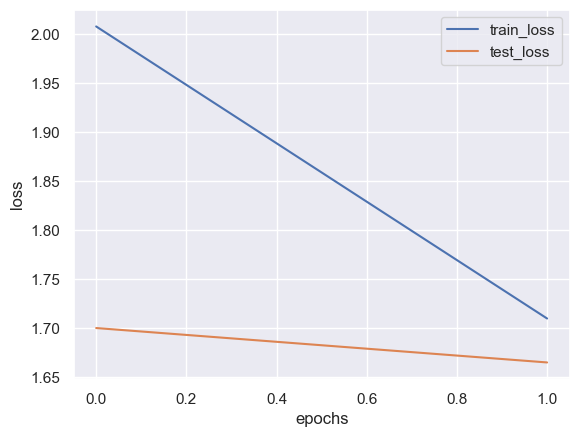

In [ ]:
df= pd.read_csv('history_1_.csv')
plt.plot(range(0, len(df['loss'])), df['loss'], label = 'train_loss')
plt.plot(range(0, len(df['val_loss'])), df['val_loss'], label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 13632s 44s/step - loss: 1.4776 - f_beta_score: 0.1826 - val_loss: 1.2959 - val_f_beta_score: 0.2324
Epoch 2/2
311/311 [==============================] - 14476s 47s/step - loss: 1.2592 - f_beta_score: 0.2195 - val_loss: 1.2419 - val_f_beta_score: 0.2420


In [ ]:
model.load_weights('weights_1_1.h5')

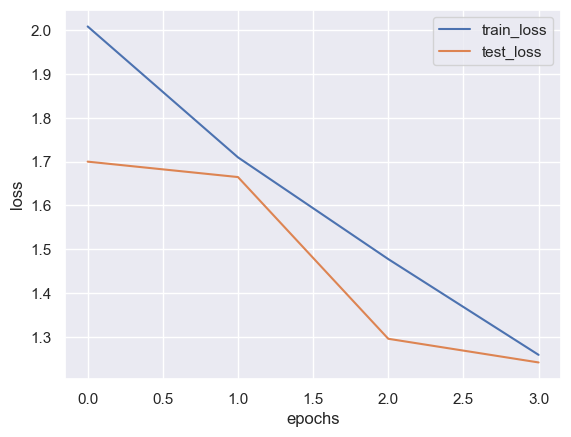

In [ ]:
df= pd.read_csv('history_1_.csv')
plt.plot(range(0, len(df['loss'])), df['loss'], label = 'train_loss')
plt.plot(range(0, len(df['val_loss'])), df['val_loss'], label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 12862s 41s/step - loss: 1.0585 - f_beta_score: 0.2610 - val_loss: 0.9835 - val_f_beta_score: 0.2699
Epoch 2/2
311/311 [==============================] - 12849s 41s/step - loss: 0.8742 - f_beta_score: 0.3171 - val_loss: 0.9013 - val_f_beta_score: 0.3347


In [ ]:
model.load_weights('weights_1_1.h5')

In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 13705s 44s/step - loss: 0.7090 - f_beta_score: 0.3800 - val_loss: 0.7194 - val_f_beta_score: 0.3991
Epoch 2/2
311/311 [==============================] - 13407s 43s/step - loss: 0.5654 - f_beta_score: 0.4507 - val_loss: 0.6553 - val_f_beta_score: 0.4262


In [ ]:
model.load_weights('weights_1_1.h5')

In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 13251s 43s/step - loss: 0.4509 - f_beta_score: 0.5132 - val_loss: 0.4511 - val_f_beta_score: 0.4833
Epoch 2/2
311/311 [==============================] - 12775s 41s/step - loss: 0.3568 - f_beta_score: 0.5683 - val_loss: 0.3196 - val_f_beta_score: 0.5674


In [ ]:
model.load_weights('weights_1_1.h5')

In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 1,
          callbacks = [early_stopping,tensorboard_cb, save_model])

311/311 [==============================] - 13266s 42s/step - loss: 0.2776 - f_beta_score: 0.6112 - val_loss: 0.3596 - val_f_beta_score: 0.5515


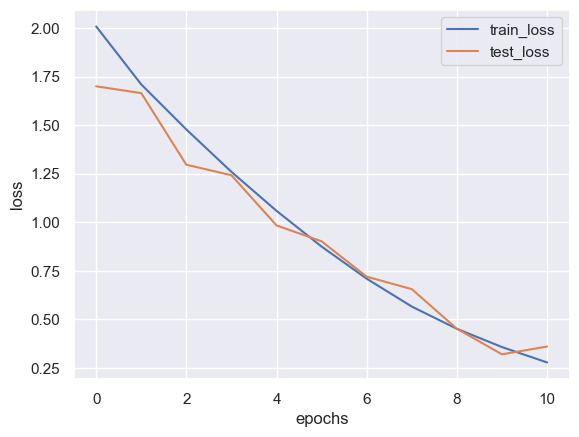

In [ ]:
df= pd.read_csv('history_1_.csv')
plt.plot(range(0, len(df['loss'])), df['loss'], label = 'train_loss')
plt.plot(range(0, len(df['val_loss'])), df['val_loss'], label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [258]:
def input_processor(input_sentence, pad_seq):

    encoder_input = preprocess(input_sentence, add_start_token=True, add_end_token=True)

    tokenized_text = tokenizer.texts_to_sequences([encoder_input])
    if pad_seq == True:
        tokenized_text = pad_sequences(
            tokenized_text, maxlen=INPUT_ENCODER_LENGTH, padding="post"
        )

    tokenized_text = tf.convert_to_tensor(tokenized_text, dtype=tf.float32)
    return tokenized_text


def remove_end_token(words):
    words_list = words.split(" ")[:-1]
    words = " ".join(words_list)
    return words

In [259]:
def plot_attention(AW, IN, OUT):
    print(IN)
    print(OUT)
    plt.figure(figsize=(8, 6))
    sns.set_theme()
    ax = sns.heatmap(AW, xticklabels=IN.split(" "), yticklabels=OUT.split(" "))
    ax.set_title("Attention weights")
    ax.set_xlabel("encoder_input")
    ax.set_ylabel("decoder_output")

In [260]:
def predict(input_sentence):

    input = input_processor(input_sentence, pad_seq=False)

    NUMBER_OF_INPUTS = input.shape[0]

    states = model.layers[0].initialize_states(NUMBER_OF_INPUTS)

    encoder_output, encoder_final_state_h, encoder_final_state_c = model.layers[0](
        input, states
    )

    input_decoder = np.zeros((1, 1))
    input_decoder[0][0] = 2

    attention_wts = []
    decoder_output_list = []

    stop = False

    while stop != True:
        (
            decoder_output,
            decoder_state_h,
            decoder_state_c,
            attention_weights,
            context_vector,
        ) = model.layers[1].one_step_decoder(
            input_decoder, encoder_output, encoder_final_state_h, encoder_final_state_c
        )

        encoder_final_state_h = decoder_state_h
        encoder_final_state_c = decoder_state_c

        index = np.argmax(decoder_output, -1)
        attention_wts.append(attention_weights)
        decoder_output_list.append(index)

        input_decoder = np.asarray(index, dtype=np.float32)
        input_decoder = np.reshape(input_decoder, (NUMBER_OF_INPUTS, 1))

        if input_decoder[0][0] == 4 or len(decoder_output_list) > input.shape[1]:
            stop = True

    arr_out = [int(np.asarray(i)) for i in decoder_output_list]

    output_words = out_tokenizer.sequences_to_texts([arr_out])

    return output_words, attention_wts

In [261]:
def translate(sent, ind, plot_attention_):
    out, attention_weights = predict(sent)

    OUT = out[0]
    IN = encoder_input[ind]

    if plot_attention_ == True:
        attention_weights = np.asarray(attention_weights)
        AW = np.reshape(
            attention_weights, (attention_weights.shape[0], attention_weights.shape[2])
        )
        plot_attention(AW, IN, OUT)

    return OUT

<start> When you are go smoothly , you have to be more modest . <end>
when you are going smoothly , you have to be more modest . <end>


'when you are going smoothly , you have to be more modest . <end>'

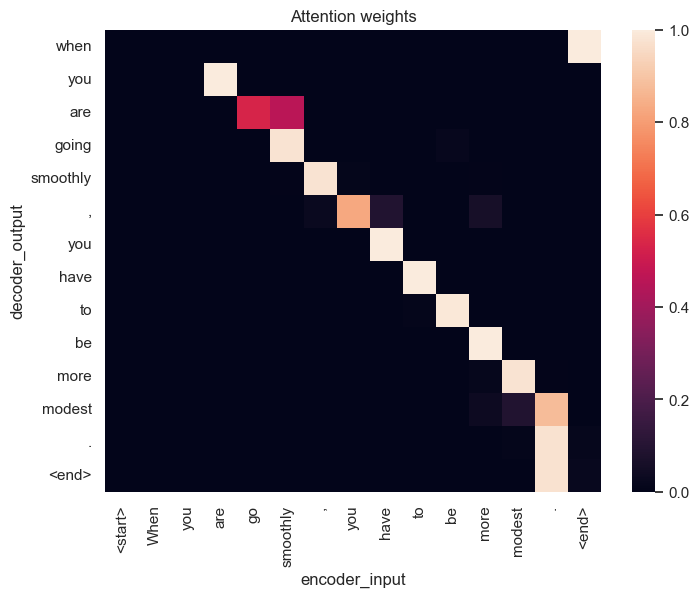

In [ ]:
translate(data["error"].loc[5], 5, plot_attention_=True)

<start> But I can study English through this . <end>
but i can study english from it . <end>


'but i can study english from it . <end>'

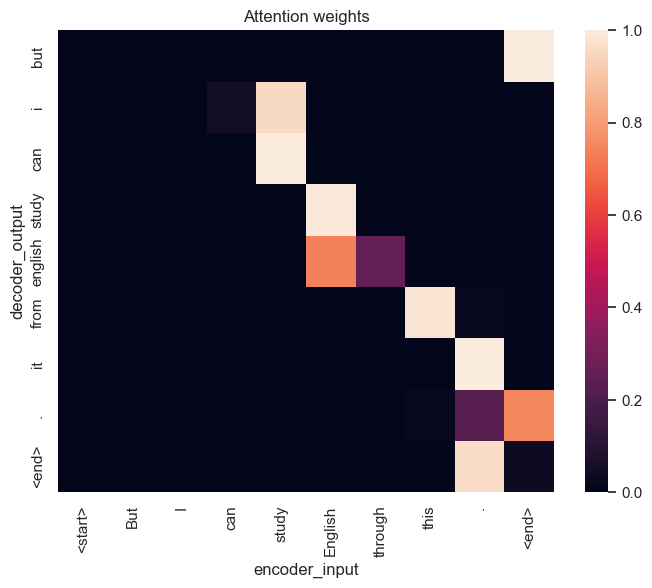

In [ ]:
translate(data["error"].loc[30], 30, plot_attention_=True)

<start> You know , you can take them at slot machine . <end>
you know , you can leave them on a slot machine . <end>


'you know , you can leave them on a slot machine . <end>'

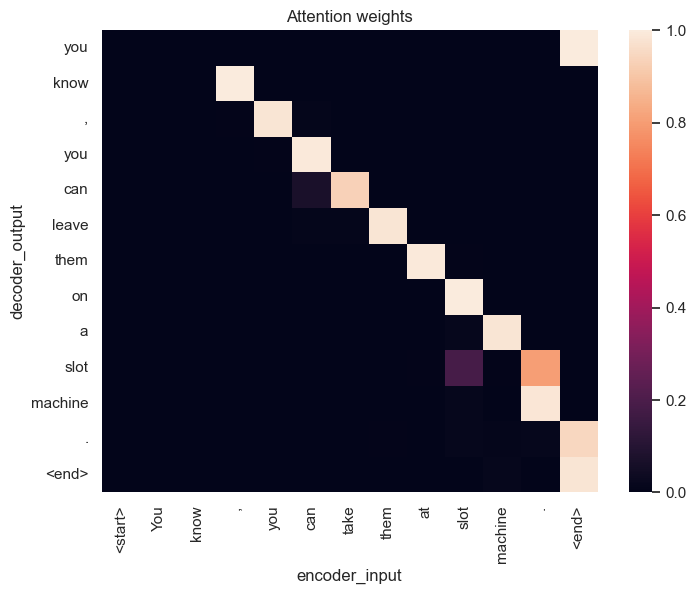

In [ ]:
translate(data["error"].loc[7], 7, plot_attention_=True)

<start> If only I had black dense curtains . <end>
even only had a black curtains curtains . <end>


'even only had a black curtains curtains . <end>'

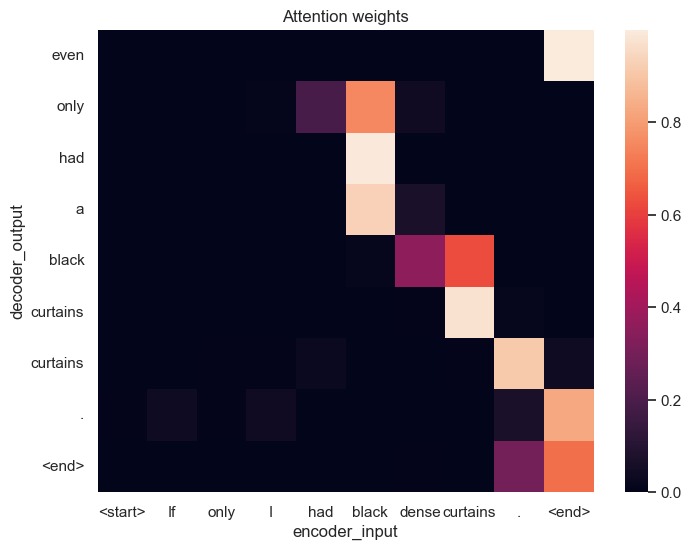

In [ ]:
translate(data["error"].loc[11], 11, plot_attention_=True)

# T5 (text-to-text tranfer transformer)

In [1]:
!pip install transformers datasets evaluate nltk pandas tensorflow gdown

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 6.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 5.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 11.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Foun

In [2]:
# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸÉÿ™ÿ®ÿßÿ™
import os
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
from transformers import T5ForConditionalGeneration, T5Tokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer
from datasets import Dataset
import evaluate
import nltk
import gdown

d:\MyFiles\My University\Fifth Year\First Semester\NLP\ŸÖÿ¥ÿ±Ÿàÿπ\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
data = pd.read_csv("cleaned2.csv")

In [5]:
data = data.rename(columns={"correct": "target", "error": "input"}).drop(columns=["identified_errors"])

In [6]:
data[:2]

target  \
0  And he took in my favorite subjects like soccer .   
1  Actually , he was the one who let me know abou...   

                                               input  
0   And he took in my favorite subject like soccer .  
1  Actually , who let me know about Lang - was him .

In [7]:
data.describe()

target                     input
count                         287054                    287054
unique                        284503                    286257
top     I am looking forward to it .  Today , I start Lang - .
freq                              23                         5

In [8]:
data = data[:200000]
data.reset_index()

index                                             target  \
0            0  And he took in my favorite subjects like soccer .   
1            1  Actually , he was the one who let me know abou...   
2            2       His Kanji ability is much better than mine .   
3            3  I heard a sentence last night when I was watch...   
4            4  When you go uphill , you have to bend your back .   
...        ...                                                ...   
199995  199995  Even though I am Japanese , I like better brea...   
199996  199996                  These breads are very expensive !   
199997  199997  That is whyI have made bread the third time th...   
199998  199998  I make bread without the fat , so it is healthy .   
199999  199999                Of course , sometimes I have rice .   

                                                    input  
0        And he took in my favorite subject like soccer .  
1       Actually , who let me know about Lang - was him .  
2           His Kanji is ability is much better than me .  
3       I heard a sentence last night when I watched TV .  
4       When you go uphill , you hvae to bend your back .  
...                                                   ...  
199995  Although I am Japanese , but I like better bre...  
199996                   These berad are very expensive !  
199997     That is why , I have made bread third a week .  
199998            I make bread without fat , so healthy .  
199999                 Of course , I sometime have rise .  

[200000 rows x 3 columns]

In [9]:
data.describe()

target                     input
count                         200000                    200000
unique                        198494                    199534
top     I am looking forward to it .  This is my first diary .
freq                              20                         4

In [10]:
data[:2]

target  \
0  And he took in my favorite subjects like soccer .   
1  Actually , he was the one who let me know abou...   

                                               input  
0   And he took in my favorite subject like soccer .  
1  Actually , who let me know about Lang - was him .

In [11]:
# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
train_df, test_df = train_test_split(data, test_size=0.1, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

In [12]:
train_df[:2]

target  \
93831  Certainly , both creativity and being artistic...   
89511  even now , at pm I feel a little bit sick , si...   

                                                   input  
93831  Certainly , both creative minds and artistic m...  
89511      even now pm I feel a little bit sick , sigh .

In [13]:
test_df[:2]

target  \
119737        I am glad to correct my English sentences .   
72272   And there were many foreigners who came to wat...   

                                                    input  
119737          I am glad to right my English sentences .  
72272   and there were many Foreigner came and saw them .

In [14]:
val_df[:2]

target  \
189800  I have never seen so much snow falling around ...   
78294                    I like cooking and eating food .   

                                                    input  
189800  I have never seen such a lot of snow falling a...  
78294                   I like cooking and eat to foods .

In [21]:
# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ ÿ™ŸÜÿ≥ŸäŸÇ Hugging Face Dataset ŸÑŸÑŸÜŸÖŸàÿ∞ÿ¨ T5
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# ÿ™ÿ≠ŸÖŸäŸÑ ŸÜŸÖŸàÿ∞ÿ¨ T5 ŸàÿßŸÑÿ™ŸàŸÉŸäŸÜŸäÿ≤ÿ±
model_name = "t5-base"
tokenizer_t5 = T5Tokenizer.from_pretrained(model_name)
model_t5 = T5ForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [22]:
# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÜÿµŸàÿµ ÿ•ŸÑŸâ ÿ™ŸÜÿ≥ŸäŸÇ T5
def preprocess_function(examples):
    inputs = [f"correct: alli sjansn ascnac aschkajsc hascj]
    targets = examples['target']
    model_inputs = tokenizer_t5(inputs, max_length=64, truncation=True, padding='max_length')
    labels = tokenizer_t5(targets, max_length=64, truncation=True, padding='max_length')
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/162000 [00:00<?, ? examples/s]

Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# ÿ™ÿØÿ±Ÿäÿ® ÿ£Ÿà ÿ™ÿ≠ŸÖŸäŸÑ ŸÜŸÖŸàÿ∞ÿ¨ T5
 # use b8682b64aafbfe0d2342a697524c91b3b1f0433a for api key - :) ali saifo
if os.path.exists("/content/drive/MyDrive/nlp/t5_gec_model"):
    model_t5 = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
    tokenizer_t5 = T5Tokenizer.from_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
    print("ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑ ŸÜŸÖŸàÿ∞ÿ¨ T5 ŸÖŸÜ ŸÖÿ¨ŸÑÿØ /content/drive/MyDrive/nlp/t5_gec_model")
else:
    print("ÿ®ÿØÿ° ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ T5...")
    training_args = Seq2SeqTrainingArguments(
                      output_dir="./results",
                      evaluation_strategy="steps",
                      per_device_train_batch_size=16,
                      per_device_eval_batch_size=16,
                      learning_rate=2e-5,
                      num_train_epochs=1,
                      weight_decay=0.01,
                      save_total_limit=2,
                      predict_with_generate=True,
                      fp16=True,
                      gradient_accumulation_steps=6,
                      eval_steps=250,
                      save_steps=250,
                      load_best_model_at_end=True,
                      logging_dir="/logs",
                      report_to="wandb",
                  )

    trainer = Seq2SeqTrainer(
        model=model_t5,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer_t5,
    )

    trainer.train()
    model_t5.save_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
    tokenizer_t5.save_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
    print("ÿ™ŸÖ ÿ≠ŸÅÿ∏ ŸÜŸÖŸàÿ∞ÿ¨ T5 ŸÅŸä ŸÖÿ¨ŸÑÿØ /content/drive/MyDrive/nlp/t5_gec_model")


ÿ®ÿØÿ° ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖŸàÿ∞ÿ¨ T5...


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-24-e3593b320428>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


ÿ™ŸÖ ÿ≠ŸÅÿ∏ ŸÜŸÖŸàÿ∞ÿ¨ T5 ŸÅŸä ŸÖÿ¨ŸÑÿØ /content/drive/MyDrive/nlp/t5_gec_model


In [25]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration


model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
tokenizer = T5Tokenizer.from_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
torch_device = 'cpu'

In [26]:
def correct_grammar(input_text,num_return_sequences):
  batch = tokenizer([input_text],truncation=True,padding='max_length',max_length=64, return_tensors="pt").to(torch_device)
  translated = model.generate(**batch,max_length=64,num_beams=4, num_return_sequences=num_return_sequences, temperature=1.5)
  tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
  return tgt_text

In [27]:
text = 'I want to school at Sunday.'
print(correct_grammar(text, num_return_sequences=1))

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `1.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


['I want to go to school on Sunday.']


In [28]:
text = 'Alex and Kosai is come to ma wedding.'
print(correct_grammar(text, num_return_sequences=1))

['Alex and Kosai are coming to my wedding .']


In [29]:
text = 'She is more taller.'
print(correct_grammar(text, num_return_sequences=1))

['She is taller.']


In [30]:
text = 'He is guy.'
print(correct_grammar(text, num_return_sequences=1))

['He is a guy.']


In [32]:
pip install tqdm

In [33]:
from torch.utils.data import DataLoader
from evaluate import load
from nltk.translate.gleu_score import sentence_gleu
import torch
from tqdm import tqdm
import time

# Function to compute GLEU
def compute_gleu(predictions, references):
    scores = [sentence_gleu([ref.split()], pred.split()) for ref, pred in zip(references, predictions)]
    return sum(scores) / len(scores)

# Function to compute ROUGE
def compute_rouge(predictions, references):
    rouge = load("rouge")
    result = rouge.compute(predictions=predictions, references=references)
    return result

# Generate predictions with progress bar
def generate_predictions(model, tokenizer, dataloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    predictions, references = [], []
    total_batches = len(dataloader)
    start_time = time.time()

    with tqdm(total=total_batches, desc="Generating Predictions") as pbar:
        for batch in dataloader:
            inputs = tokenizer(batch['input'], return_tensors="pt", truncation=True, padding=True, max_length=64)
            inputs = {key: value.to(device) for key, value in inputs.items()}

            # Generate outputs for the batch
            outputs = model.generate(inputs["input_ids"], max_length=64, num_beams=2)
            decoded_preds = [tokenizer.decode(o, skip_special_tokens=True) for o in outputs]

            predictions.extend(decoded_preds)
            references.extend(batch['target'])

            # Update progress bar
            pbar.update(1)

    total_time = time.time() - start_time
    print(f"Prediction completed in {total_time / 60:.2f} minutes.")
    return predictions, references

# Evaluate the model
print("Evaluating the model...")
test_dataloader = DataLoader(test_dataset, batch_size=16)  # Batch processing
predictions, references = generate_predictions(model_t5, tokenizer_t5, test_dataloader)
gleu_score = compute_gleu(predictions, references)
rouge_scores = compute_rouge(predictions, references)

print(f"GLEU Score: {gleu_score}")
print(f"ROUGE Scores: {rouge_scores}")


Evaluating the model...


Generating Predictions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1250/1250 [24:42<00:00,  1.19s/it]


Prediction completed in 24.70 minutes.


ImportError: To be able to use evaluate-metric/rouge, you need to install the following dependencies['rouge_score'] using 'pip install rouge_score' for instance'

In [34]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=b0908e87a732bbe8e0ac9dacc2abd45a94e3dc4a6869d9feb334b9c764c8dbc6
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [35]:
gleu_score = compute_gleu(predictions, references)
rouge_scores = compute_rouge(predictions, references)

print(f"GLEU Score: {gleu_score}")
print(f"ROUGE Scores: {rouge_scores}")

GLEU Score: 0.575149739439773
ROUGE Scores: {'rouge1': 0.8043869607997454, 'rouge2': 0.633349645144037, 'rougeL': 0.7918098192007212, 'rougeLsum': 0.7918229236944632}
